# 1. Chargements des bibliothéques à utiliser

In [75]:
# importing required modules
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #data viz
import seaborn as sns #data viz
import pickle #Pickle for pickling (saving) the model 
from wordcloud import WordCloud #Representation des données
import warnings #ignorer les warnings 
warnings.filterwarnings('ignore')

# For Text processing 
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import re

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.externals import joblib

In [17]:
import sys
print(sys.executable)

C:\ProgramData\Anaconda3\python.exe


# 2. Transformation des données en data Frame

In [76]:
# importing the dataset
dataframe = pd.read_csv('spam.csv', encoding='latin-1')


In [77]:
#Affichage des données
dataframe.head()

,class,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [78]:
#Suppression des colonnes qui n'a pas de sens 
dataframe.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)


In [79]:
#Let's change the names of the columns according to their significance
dataframe.columns = ['class', 'message']

In [80]:
#Affichage des nouveau colonnes
dataframe.head()


,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# 3. Visualisation des données(Comprendre les données)

In [23]:
#Le nombre des lignes et colonnes
dataframe.shape

(5572, 2)

In [24]:
# No NaN in the dataset
dataframe.isna().sum()

class      0
message    0
dtype: int64

In [25]:
dataframe.groupby('class').count()


,message
class,
ham,4825
spam,747


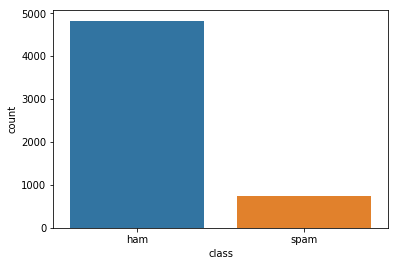

In [26]:
sns.countplot(x='class',data=dataframe)

In [27]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
class      5572 non-null object
message    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [28]:
dataframe.isna().sum()

class      0
message    0
dtype: int64

In [29]:
dataframe.isnull().sum()

class      0
message    0
dtype: int64

In [30]:
#Lets check if email length is coorelated to spam/ham
dataframe['length'] = dataframe['message'].map(lambda text: len(text))

dataframe.groupby('class').length.describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
ham,4825.0,71.023627,58.016023,2.0,33.0,52.0,92.0,910.0
spam,747.0,138.866131,29.183082,13.0,132.5,149.0,157.0,224.0


In [96]:
#emails length have some extreme outliers, lets set a length threshold & check length distribution
message = dataset[dataset.length < 1800]
message.hist(column='length', by='class', bins=50)

#Nothing much here, lets process the contents of mail now for building spam filter

AttributeError: 'DataFrame' object has no attribute 'length'

In [82]:
# Features and Labels
dataset['label'] = dataset['class'].map({'ham': 0, 'spam': 1})
X = dataset['message']
y = dataset['label']

# 4. Transformation (word to vector) Tokenization & Vectorization

In [83]:
# Extract Feature With CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(X) # Fit the Data

# 5. Train Test Split

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [85]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3733, 8672)
(1839, 8672)
(3733,)
(1839,)


# 6. Paramétré l'algorithme d'apprentissage

In [ ]:
**Random Forest

In [86]:
# Fitting Naive Bayes to the Training set

from sklearn.ensemble import RandomForestClassifier


In [87]:
#Apprentissage

cl=RandomForestClassifier()
cl.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [88]:
# Predicting the Test set results

y_pred = cl.predict(X_test)

In [89]:
# Validation par des mesures de performances

from sklearn.metrics import confusion_matrix,accuracy_score


In [90]:
cm2 = confusion_matrix(y_test, y_pred)
print('Accuracy: ', accuracy_score(y_test, y_pred) * 100)

Accuracy:  97.22675367047309


In [ ]:
**Naive_bayes

In [91]:
# Fitting Naive Bayes to the Training set

from sklearn.naive_bayes import MultinomialNB

# 7. Apprentissage

In [92]:
#Naive Bayes Classifier

clf = MultinomialNB()
clf.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

# 8. Prediction

In [93]:

y_pred=clf.score(X_test,y_test)


# 9. Validation par des mesures de performances

In [94]:
y_pred

0.9793365959760739

# 10. Creating a pickle file for the Multinomial Naive Bayes model


In [95]:
#Alternative Usage of Saved Model
joblib.dump(clf, 'NB_spam_model.pkl')
joblib.dump(cv, 'cv.pkl')

['cv.pkl']